### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

df2

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


### Mer eller mindre relevante kodesnutter

In [4]:
print(df2.mean(numeric_only = True))

Pieces           413.570028
Price             46.351345
Pages            103.260504
Minifigures        3.215686
Unique_Pieces    144.670868
dtype: float64


In [5]:
print(df2['Theme'].value_counts())

Theme
Friends              94
City                 94
Star Wars            85
NINJAGO              77
Marvel               47
Disney               35
DUPLO                32
THE LEGO MOVIE 2     25
Harry Potter         22
Minecraft            21
Creator 3-in-1       21
Hidden Side          19
Jurassic World       19
Speed Champions      17
Batman               16
Juniors              12
Creator Expert       10
Monkie Kid            9
Ideas                 8
DC                    8
Trolls World Tour     8
Overwatch             7
LEGO Frozen 2         7
Unikitty              6
Classic               4
Minifigures           3
Spider-Man            2
Powerpuff Girls       2
Minions               2
Stranger Things       1
Powered UP            1
Name: count, dtype: int64


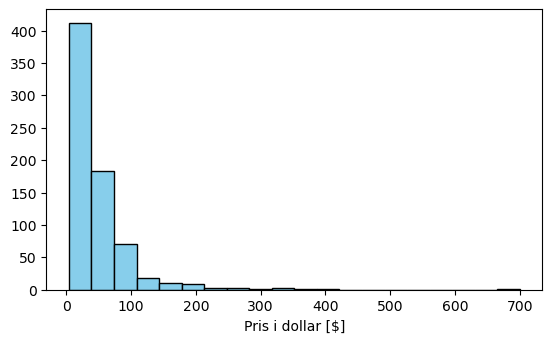

In [6]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

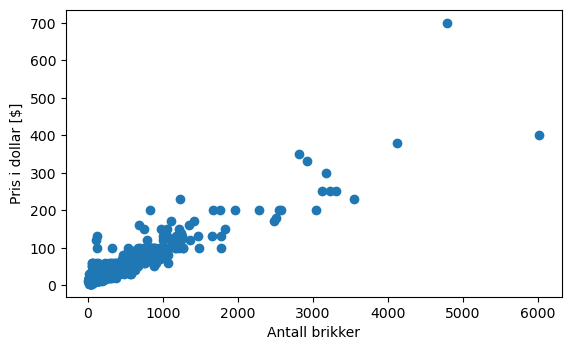

In [7]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [8]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name         Imperial Star Destroyer
Theme                          Star Wars
Pieces                            4784.0
Price                             699.99
Pages                              444.0
Minifigures                          2.0
Unique_Pieces                      445.0
Name: 825, dtype: object


In [9]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name         Hogwarts Castle
Theme               Harry Potter
Pieces                    6020.0
Price                     399.99
Pages                      636.0
Minifigures                 28.0
Unique_Pieces              624.0
Name: 821, dtype: object


In [10]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Minifigures        12.99
Unikitty           18.99
Powerpuff Girls    24.99
Name: Price, dtype: float64

In [11]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

Theme
Powered UP         2925.0
Stranger Things    2287.0
Creator Expert     2073.5
Name: Pieces, dtype: float64

C:\Users\matsb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


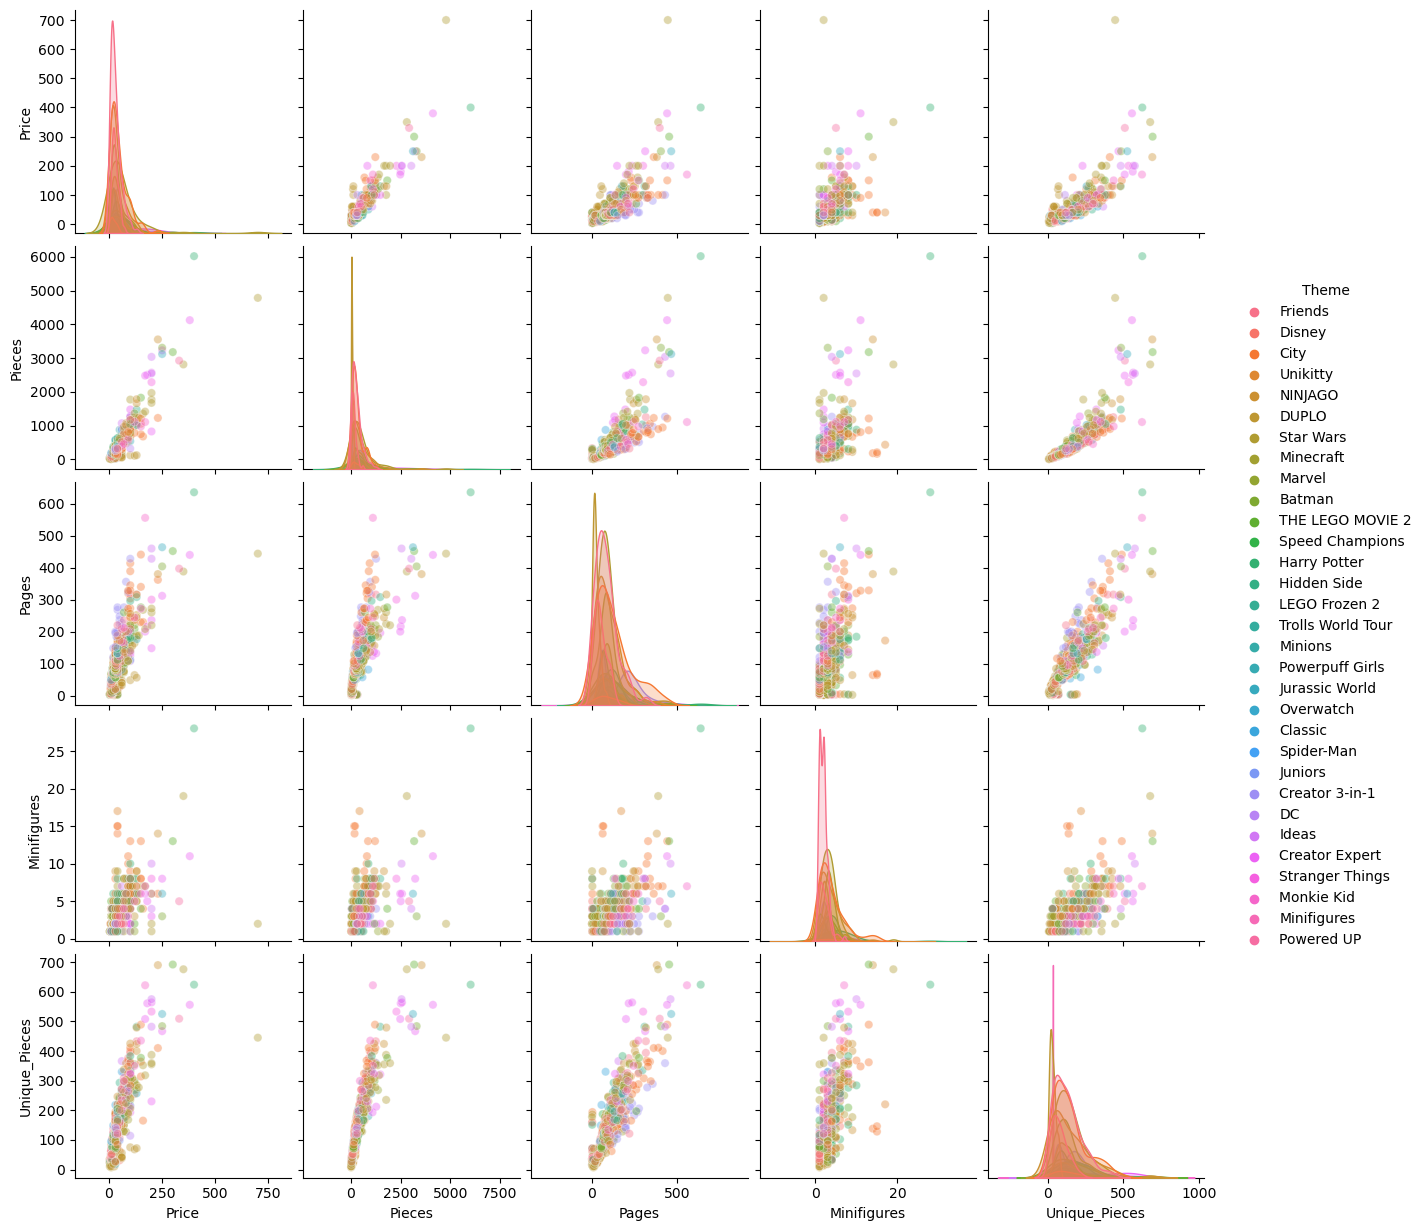

In [12]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [13]:
# enkel lineær regresjon
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        14:37:55   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

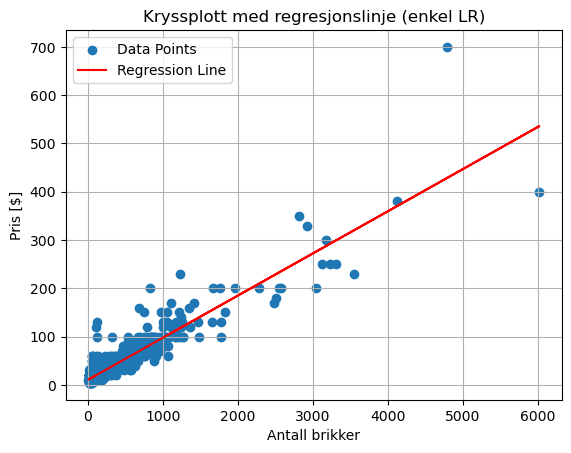

In [14]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

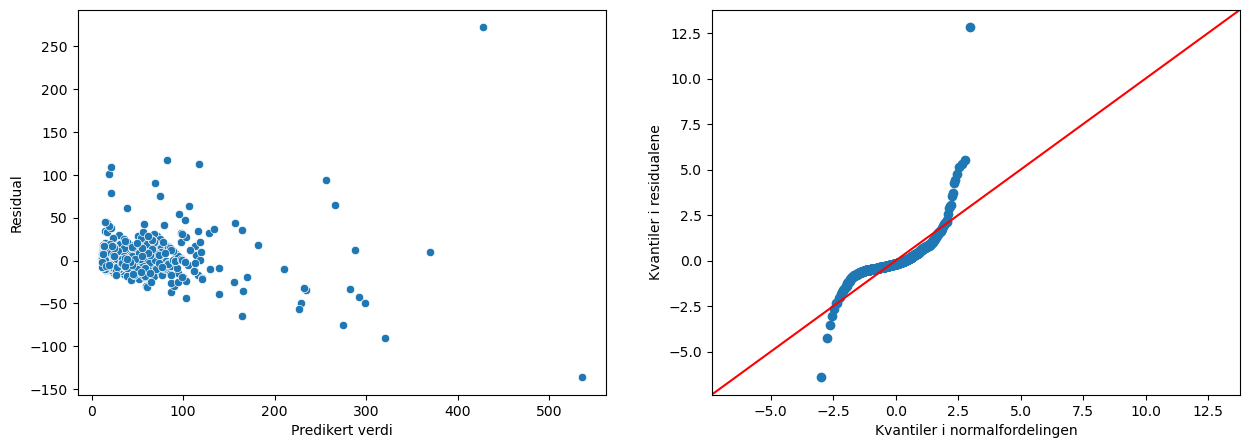

In [15]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

C:\Users\matsb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


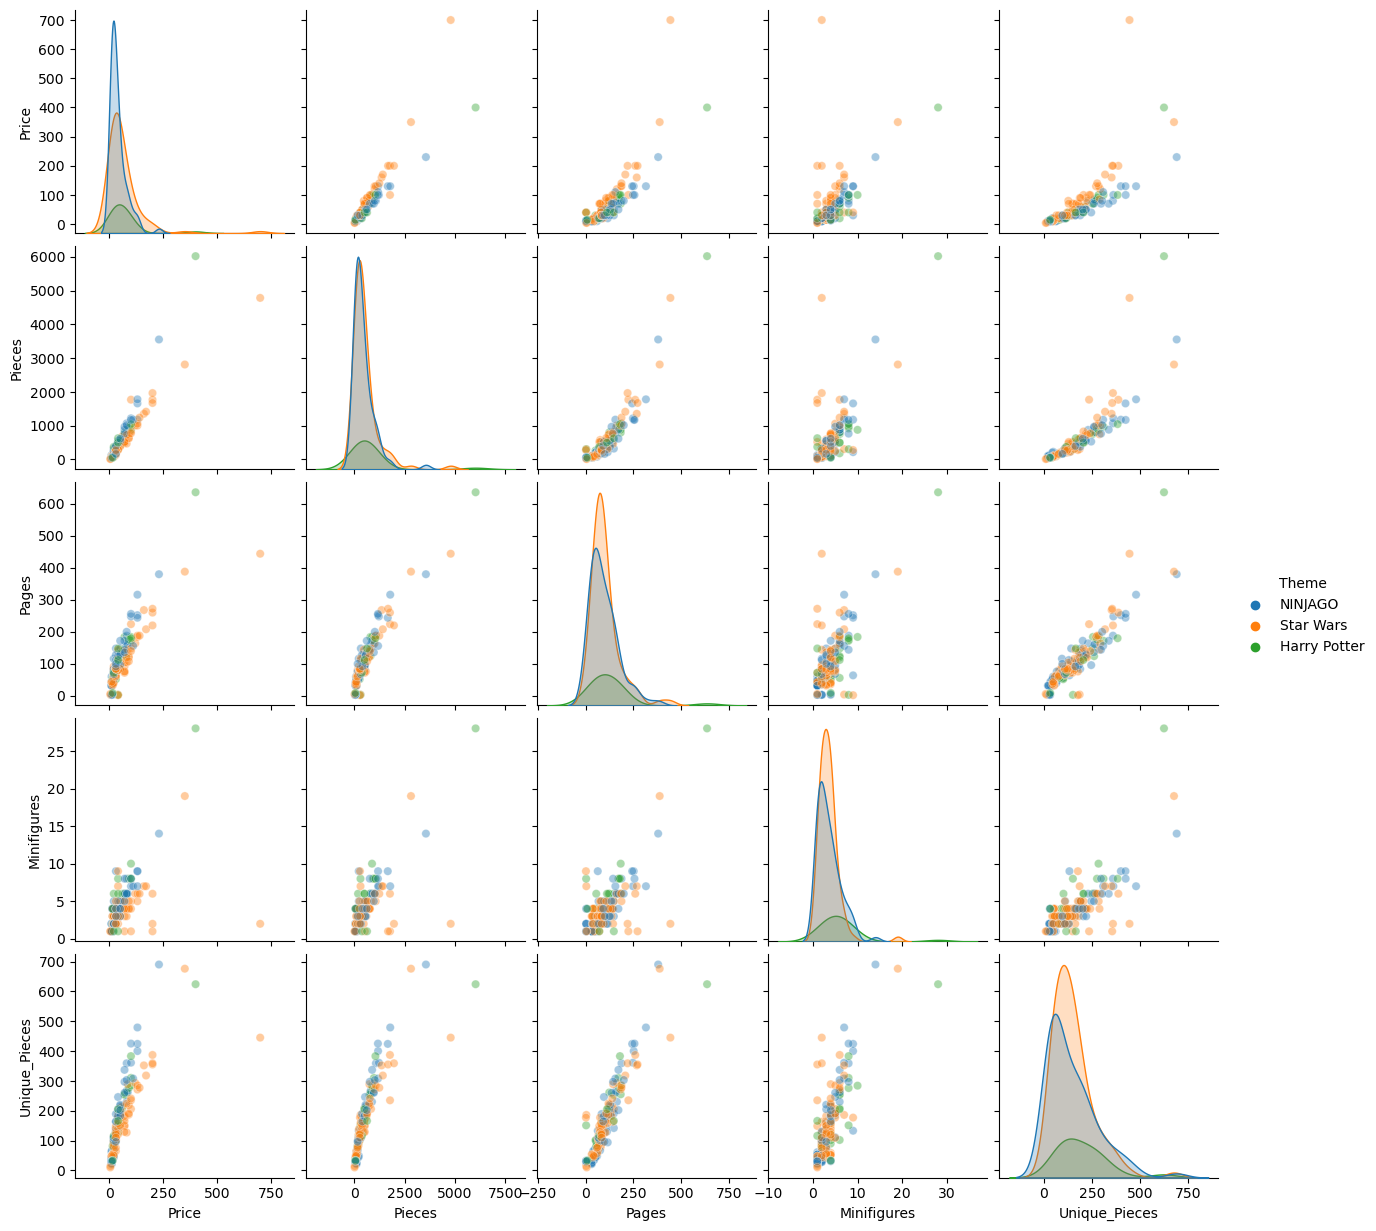

In [16]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [17]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [18]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

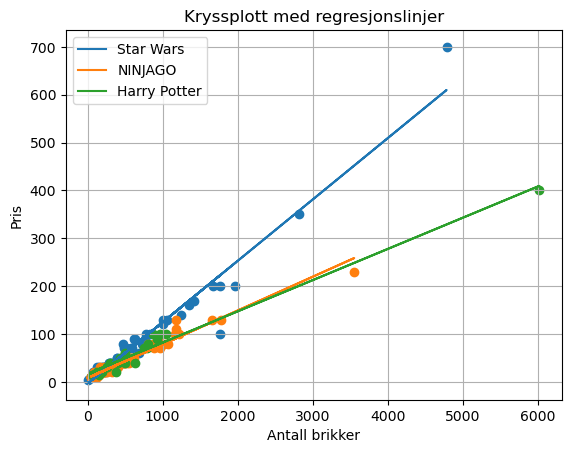

In [19]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [20]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Theme' , data = subset_df)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     405.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.75e-80
Time:                        14:38:08   Log-Likelihood:                -859.58
No. Observations:                 184   AIC:                             1727.
Df Residuals:                     180   BIC:                             1740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.4043      5.939     -0.742      0.459     -16.123       7.314
Theme[T.NINJAGO]       2.4213      6.380      0.380      0.705     -10.168      15.011
Theme[T.Star Wars]    18.5491      6.288      2.950      0.004       6.142      30.956
Pieces                 0.0934      0.003     34.324      0.000       0.088       0.099
==============================================================================
Omnibus:                      169.225   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16631.576
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      49.263   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     405.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.75e-80
Time:                        14:38:08   Log-Likelihood:                -859.58
No. Observations:                 184   AIC:                             1727.
Df Residuals:                     180   BIC:                             1740.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           14.1448      3.163      4.472      0.000       7.904      20.386
C(Theme, Treatment("Star Wars"))[T.Harry Potter]   -18.5491      6.288     -2.950      0.004     -30.956      -6.142
C(Theme, Treatment("Star Wars"))[T.NINJAGO]        -16.1278      4.119     -3.915      0.000     -24.256      -7.999
Pieces                                               0.0934      0.003     34.324      0.000       0.088       0.099
==============================================================================
Omnibus:                      169.225   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16631.576
Skew:                           2.694   Prob(JB):                         0.00
Kurtosis:                      49.263   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

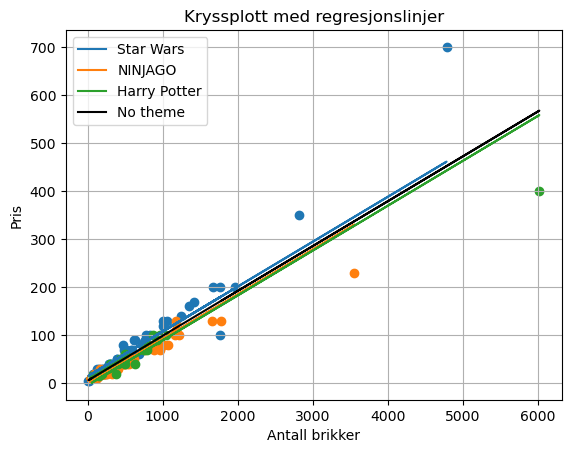

In [22]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [23]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     833.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.84e-121
Time:                        14:38:08   Log-Likelihood:                -754.15
No. Observations:                 184   AIC:                             1520.
Df Residuals:                     178   BIC:                             1540.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.8126      3.742      4.493      0.000       9.428      24.197
Theme[T.NINJAGO]             -8.8891      4.330     -2.053      0.042     -17.433      -0.345
Theme[T.Star Wars]          -20.5964      4.250     -4.846      0.000     -28.983     -12.209
Pieces                        0.0652      0.003     24.506      0.000       0.060       0.070
Pieces:Theme[T.NINJAGO]       0.0053      0.004      1.289      0.199      -0.003       0.014
Pieces:Theme[T.Star Wars]     0.0630      0.004     17.717      0.000       0.056       0.070
==============================================================================
Omnibus:                      142.464   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9093.055
Skew:                          -2.125   Prob(JB):                         0.00
Kurtosis:                      37.176   Cond. No.                     6.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

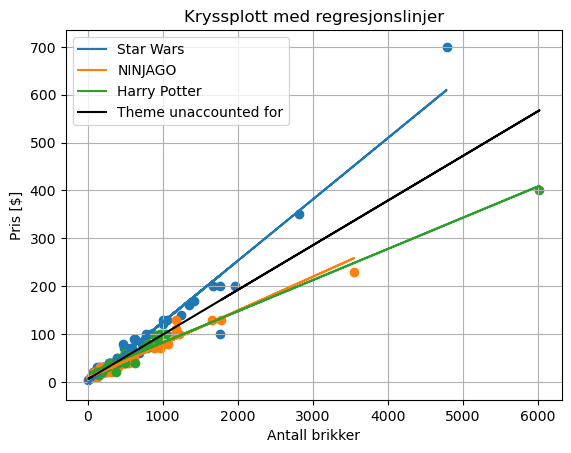

In [24]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

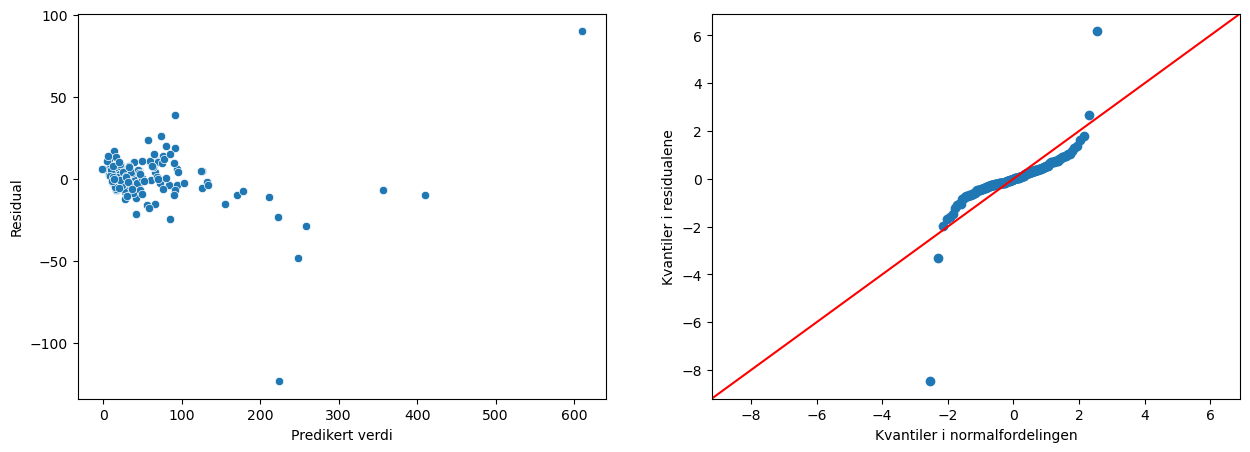

In [26]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### Preprosessere dataene

In [27]:
# Gruppere temaene i nye grupper

df2['Generation'] = np.where(df2['Theme'].isin(['City', 'Star Wars', 'NINJAGO', 'DUPLO', 'Harry Potter', 'Creator 3-in-1',
                                                'Classic', 'Minifigures']), 'Our',
                    np.where(df2['Theme'].isin(['Friends', 'THE LEGO MOVIE 2', 'Minecraft', 'Hidden Side', 'Unikitty',
                                                'Jurassic World', 'Speed Champions', 'Juniors', 'Monkie Kid',
                                                'Trolls World Tour', 'Overwatch', 'LEGO Frozen 2', 'Powerpuff Girls',
                                                'Minions', 'Stranger Things']), 'After', 'Unsure'))
df2.groupby(['Generation']).size().reset_index(name = 'Count')

,Generation,Count
0,After,249
1,Our,338
2,Unsure,127


In [28]:
# Tabell med de nye gruppene

df2.groupby(['Generation', 'Theme']).size().reset_index(name = 'Count')

,Generation,Theme,Count
0,After,Friends,94
1,After,Hidden Side,19
2,After,Juniors,12
3,After,Jurassic World,19
4,After,LEGO Frozen 2,7
5,After,Minecraft,21
6,After,Minions,2
7,After,Monkie Kid,9
8,After,Overwatch,7
9,After,Powerpuff Girls,2


### Tilpasse og evaluere modell/er

In [29]:
# Enkel lineær regresjon

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        14:38:09   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

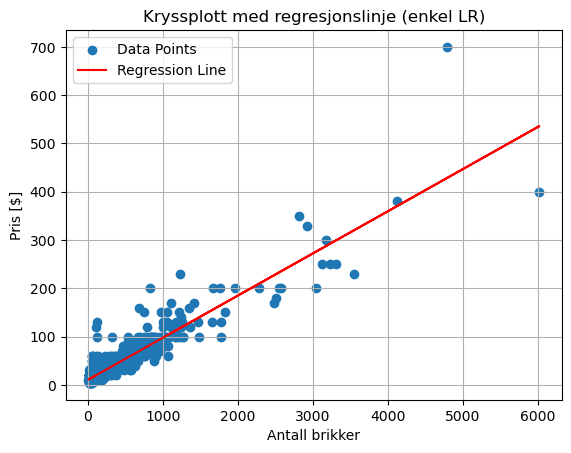

In [30]:
# Plotte enkel regresjonsmodell

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

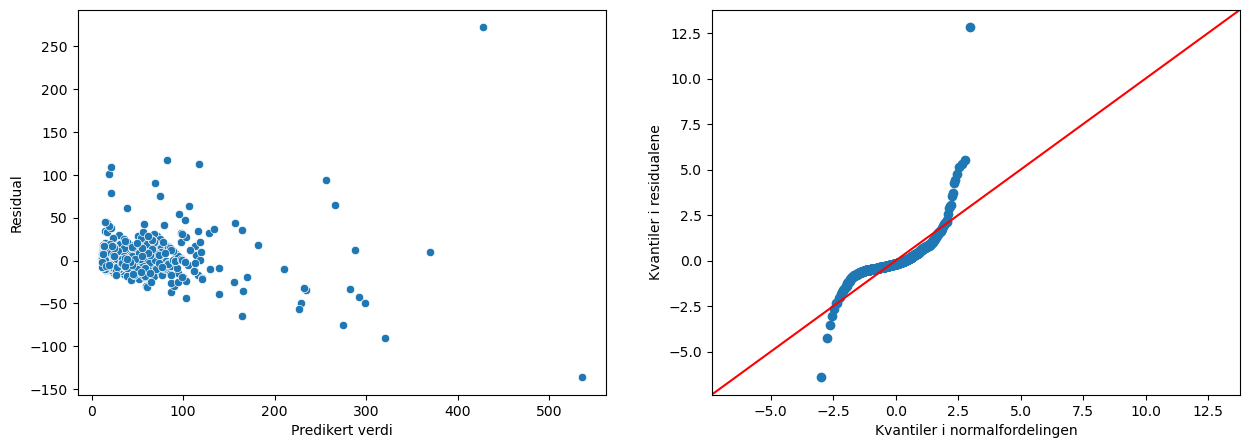

In [31]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel("Predikert verdi")
axis[0].set_ylabel("Residual")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel("Kvantiler i normalfordelingen")
axis[1].set_ylabel("Kvantiler i residualene")

plt.show()

In [32]:
# Multippel lineær regresjon

formel = 'Price ~ Pieces + Pages'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1970.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.11e-290
Time:                        14:38:10   Log-Likelihood:                -3183.1
No. Observations:                 714   AIC:                             6372.
Df Residuals:                     711   BIC:                             6386.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5142      1.250      5.210      0.000       4.059       8.969
Pieces         0.0780      0.002     32.271      0.000       0.073       0.083
Pages          0.0735      0.016      4.737      0.000       0.043       0.104
==============================================================================
Omnibus:                      746.640   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96426.614
Skew:                           4.487   Prob(JB):                         0.00
Kurtosis:                      59.220   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

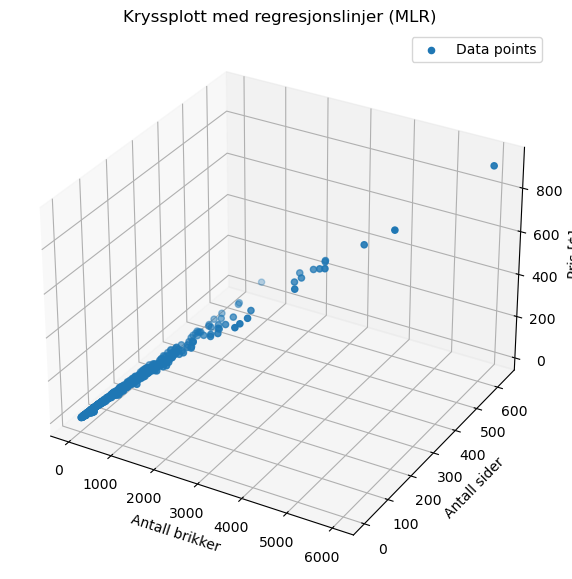

In [33]:
# Plotte multippel regresjonsmodell
# Kode hentet fra https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/ den 07.11.2023
# Kode hentet fra https://stackoverflow.com/questions/74426028/pyplot-3d-scatter-plot-zlabel den 07.11.2023

slope = resultat.params['Pieces'] + resultat.params['Pages']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = np.array(df2['Pages'])

regression_z = slope * regression_x + intercept

fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = "3d")

ax.scatter3D(regression_x, regression_y, regression_z, label = 'Data points')

ax.set_xlabel('Antall brikker')
ax.set_ylabel('Antall sider')
ax.set_zlabel('Pris [$]')

plt.title('Kryssplott med regresjonslinjer (MLR)')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Enkel lineær regresjon for vår generasjon

subset_df2 = df2[df2['Generation'].isin(['Our'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1409.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          3.02e-122
Time:                        14:38:11   Log-Likelihood:                -1578.9
No. Observations:                 338   AIC:                             3162.
Df Residuals:                     336   BIC:                             3169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6714      1.730      6.169      0.000       7.269      14.074
Pieces         0.0924      0.002     37.539      0.000       0.088       0.097
==============================================================================
Omnibus:                      256.214   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14653.009
Skew:                           2.507   Prob(JB):                         0.00
Kurtosis:                      34.864   Cond. No.                         863.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

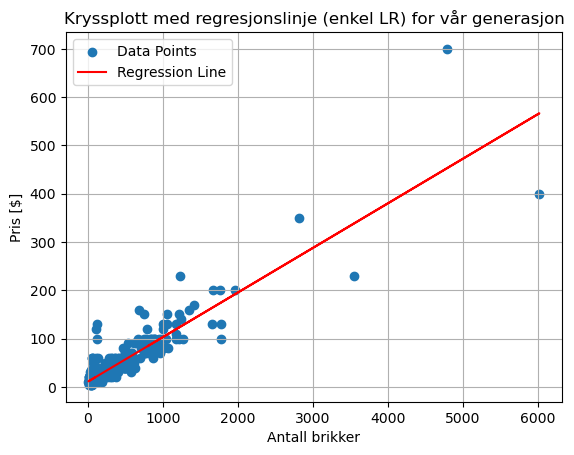

In [35]:
# Plotte enkel regresjonsmodell for vår generasjon

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for vår generasjon')
plt.legend()
plt.grid()
plt.show()

In [36]:
# Enkel lineær regresjon for etter vår generasjon

subset_df2 = df2[df2['Generation'].isin(['After'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     2500.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          3.38e-131
Time:                        14:38:11   Log-Likelihood:                -957.11
No. Observations:                 249   AIC:                             1918.
Df Residuals:                     247   BIC:                             1925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6099      0.974      6.784      0.000       4.691       8.529
Pieces         0.0906      0.002     49.997      0.000       0.087       0.094
==============================================================================
Omnibus:                      100.295   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.969
Skew:                           1.484   Prob(JB):                    4.71e-129
Kurtosis:                       9.939   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

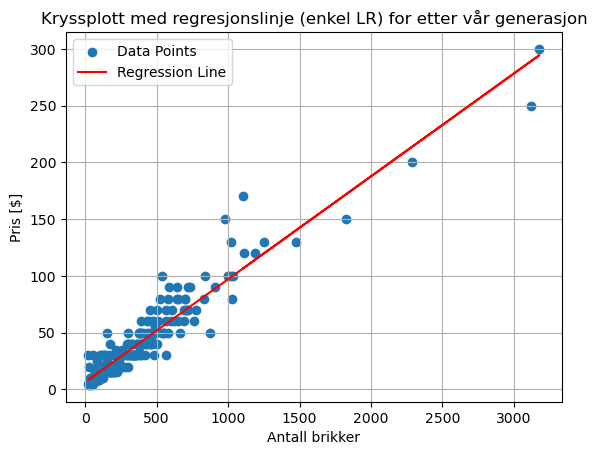

In [37]:
# Plotte enkel regresjonsmodell for etter vår generasjon

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for etter vår generasjon')
plt.legend()
plt.grid()
plt.show()

In [38]:
# Enkel lineær regresjon for usikker

subset_df2 = df2[df2['Generation'].isin(['Unsure'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1097.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           9.92e-64
Time:                        14:38:12   Log-Likelihood:                -559.71
No. Observations:                 127   AIC:                             1123.
Df Residuals:                     125   BIC:                             1129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4210      2.169      6.189      0.000       9.129      17.713
Pieces         0.0779      0.002     33.117      0.000       0.073       0.083
==============================================================================
Omnibus:                      102.730   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1091.062
Skew:                           2.712   Prob(JB):                    1.20e-237
Kurtosis:                      16.296   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

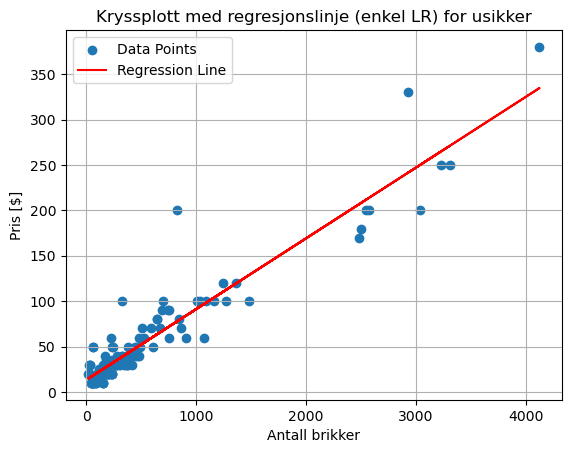

In [39]:
# Plotte enkel regresjonsmodell for usikker

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for usikker')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Multippel lineær regresjon med eget skjæringspunkt for hver gruppe

formel = 'Price ~ Pieces + Generation'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1283.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.07e-286
Time:                        14:38:12   Log-Likelihood:                -3189.7
No. Observations:                 714   AIC:                             6387.
Df Residuals:                     710   BIC:                             6406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.7877      1.435      5.426      0.000       4.970      10.605
Generation[T.Our]        4.9267      1.767      2.789      0.005       1.458       8.395
Generation[T.Unsure]     0.6280      2.317      0.271      0.786      -3.922       5.178
Pieces                   0.0873      0.001     61.642      0.000       0.085       0.090
==============================================================================
Omnibus:                      648.766   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60278.411
Skew:                           3.613   Prob(JB):                         0.00
Kurtosis:                      47.429   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Definerer gruppene

generations = ['After', 'Our', 'Unsure']

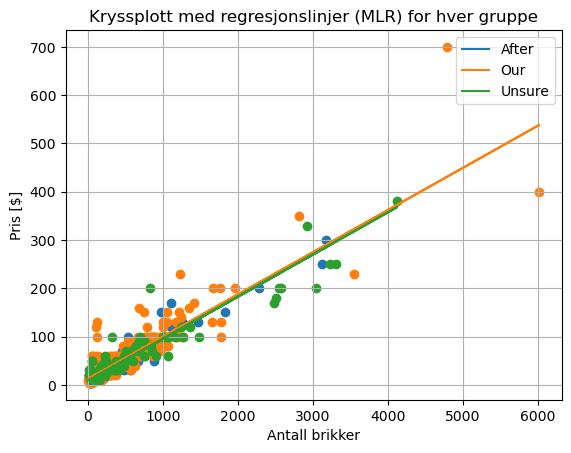

In [42]:
# Plotte multippel regresjonsmodell med eget skjæringspunkt for hver gruppe

intercept = [resultat.params['Generation[T.Unsure]'], resultat.params['Generation[T.Our]'], 0] + resultat.params['Intercept']
slope = resultat.params['Pieces']

for i, generation in enumerate(generations):
    
    regression_x = np.array(df2[df2['Generation'].isin([generation])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]
    
    plt.scatter(df2[df2['Generation'].isin([generation])]['Pieces'], df2[df2['Generation'].isin([generation])]['Price'])
    plt.plot(regression_x, regression_y, label = generation)

plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer (MLR) for hver gruppe')
plt.legend()
plt.grid()
plt.show()

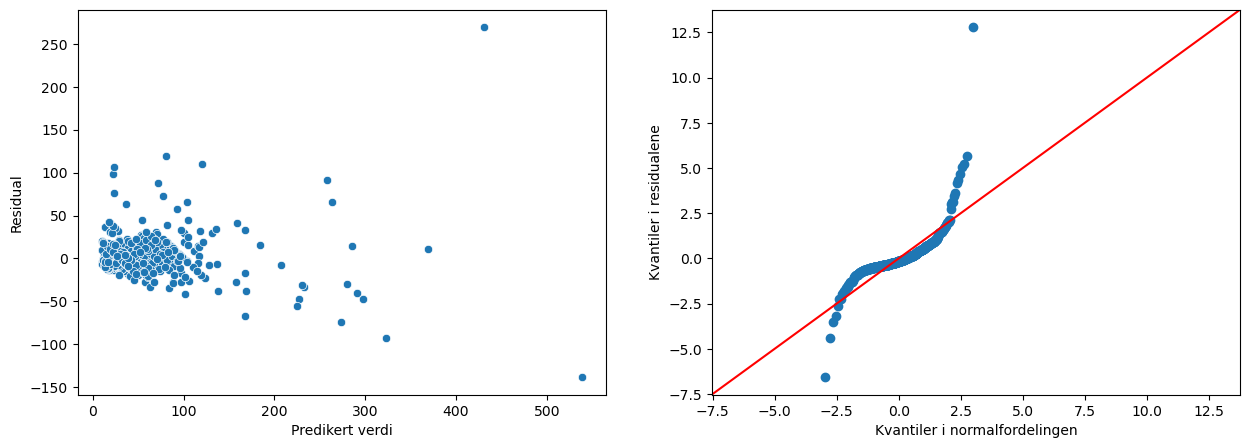

In [43]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel("Predikert verdi")
axis[0].set_ylabel("Residual")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel("Kvantiler i normalfordelingen")
axis[1].set_ylabel("Kvantiler i residualene")

plt.show()

In [44]:
# Multippel lineær regresjon med eget stigningstall og skjæringspunkt for hver gruppe

formel = 'Price ~ Pieces * Generation'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     796.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          9.14e-288
Time:                        14:38:13   Log-Likelihood:                -3178.7
No. Observations:                 714   AIC:                             6369.
Df Residuals:                     708   BIC:                             6397.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.6099      1.790      3.692      0.000       3.095      10.125
Generation[T.Our]               4.0616      2.267      1.791      0.074      -0.390       8.513
Generation[T.Unsure]            6.8112      2.883      2.363      0.018       1.151      12.471
Pieces                          0.0906      0.003     27.212      0.000       0.084       0.097
Pieces:Generation[T.Our]        0.0018      0.004      0.457      0.648      -0.006       0.009
Pieces:Generation[T.Unsure]    -0.0127      0.004     -3.072      0.002      -0.021      -0.005
==============================================================================
Omnibus:                      554.958   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47126.674
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      42.406   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

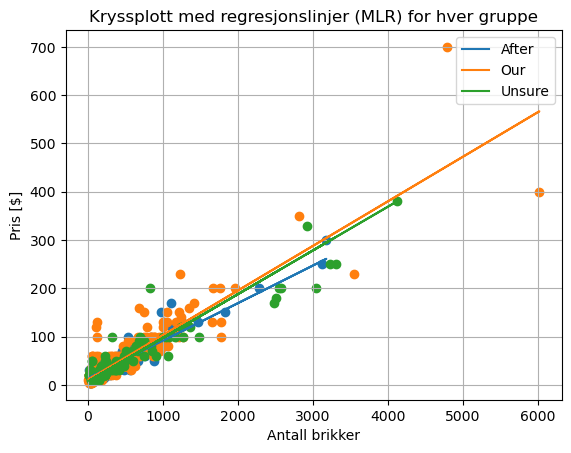

In [45]:
# Plotte multippel regresjonsmodell med eget stigningstall og skjæringspunkt for hver gruppe

intercept = [resultat.params['Generation[T.Unsure]'], resultat.params['Generation[T.Our]'], 0] + resultat.params['Intercept']
slope = [resultat.params['Pieces:Generation[T.Unsure]'], resultat.params['Pieces:Generation[T.Our]'], 0] + resultat.params['Pieces']

for i, generation in enumerate(generations):
    
    regression_x = np.array(df2[df2['Generation'].isin([generation])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]
    
    plt.scatter(df2[df2['Generation'].isin([generation])]['Pieces'], df2[df2['Generation'].isin([generation])]['Price'])
    plt.plot(regression_x, regression_y, label = generation)

plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer (MLR) for hver gruppe')
plt.legend()
plt.grid()
plt.show()

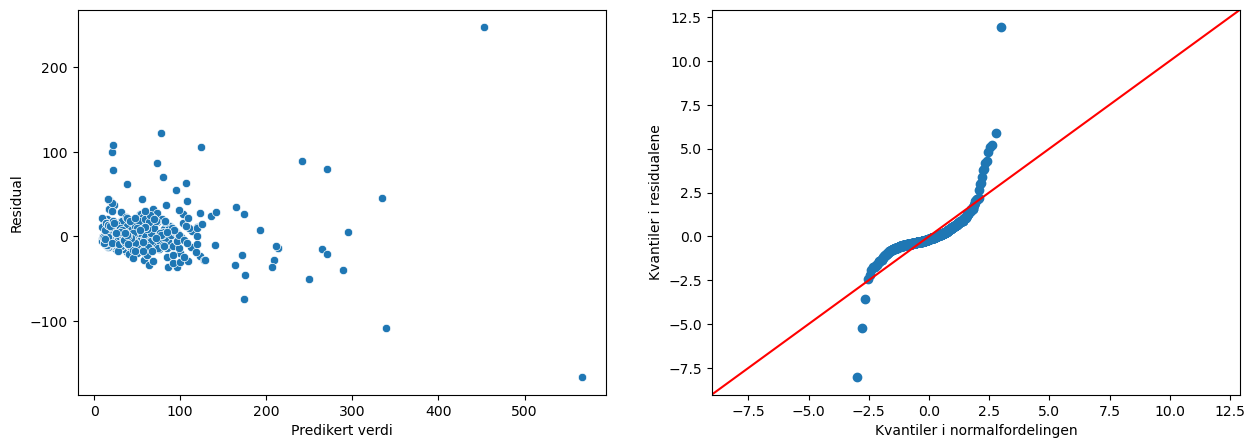

In [46]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel("Predikert verdi")
axis[0].set_ylabel("Residual")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel("Kvantiler i normalfordelingen")
axis[1].set_ylabel("Kvantiler i residualene")

plt.show()